### This notebook is designed to create pesudorandom distribution of the beacons - dividing area into 9 segments and checking if previous was put in the same segment if so then switch it, or another solution is to measure the distnace from a point and generate another center if circa 20 cm from previous one.

In [84]:
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.patches as patches
from PIL import Image
import matplotlib.image as mpimg
import pandas as pd
import math
figures = 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/Figures/'
processed= 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/processed/'

### Random number generator 

In [43]:
# generate random floating point values
from random import seed
from random import random
# seed random number generator
seed(1)
# generate random numbers between 0-1
for _ in range(10):
	value = np.random.random()
	print(value)
    

0.545657537523625
0.8186962914737225
0.8219024749444358
0.13612430843912615
0.31180778703015244
0.8805118056879072
0.44262720768091135
0.6153431949766754
0.8165455711708451
0.18182979951716516


### Settign the size of the arena as in render script 

In [86]:

cut = 0 # keeping the cut where rectangle of arena ends
X_cut_min = -0.37
Y_cut_max = 1.02
X_cut_max = 0.22
Y_cut_min = -0.59
print("area %s M*2" %((X_cut_max-X_cut_min)*(Y_cut_max-Y_cut_min))) 

area 0.9498999999999999 M*2


### Calculate how far each point from each other 

In [85]:
def calculateDistance(x,y,x2,y2):
    dist = math.sqrt((x - x2)**2 + (y - y2)**2)
    return dist

### Plot rectangle with 100 points where the previous one is not closer then 30 cm 

loop
0.6775551544638337
0.4692252257301754
0.5360428296811486
0.98765521987472
0.48072247564563325
0.8435829505064362
0.5595317831185723
small
0.14633128419071287
0.36995590486139424
small
0.20567356149206747
0.6480890702665112
0.7498613251110146
small
0.20016993279274994
small
0.20546289177139312
small
0.0857466375363397
0.5043159582308301
0.8729818765434596
0.4681307969377888
0.8721884316173258
small
0.1767017988696571
0.7979768994727114
0.33729155303094593
small
0.20165417504132488
0.9316288150709434
small
0.2712924062332476
0.8950754371056469
small
0.28137937260571877
0.6174515426969207
1.0448257964175036
0.41980217659851815
0.42674424154320556
0.7150857895175107
0.9602216336855967
small
0.1720319405029332
0.5627648261587397
small
0.2988326033273302
0.7682581500772894
0.6459044183066558
0.5911721406309604
small
0.2463447350669319
0.624512339597518
0.49251449162203204
0.4033248501736691
0.42186529961188257
0.8675812999882306
small
0.19092990598599693
1.082112378167437
small
0.157442

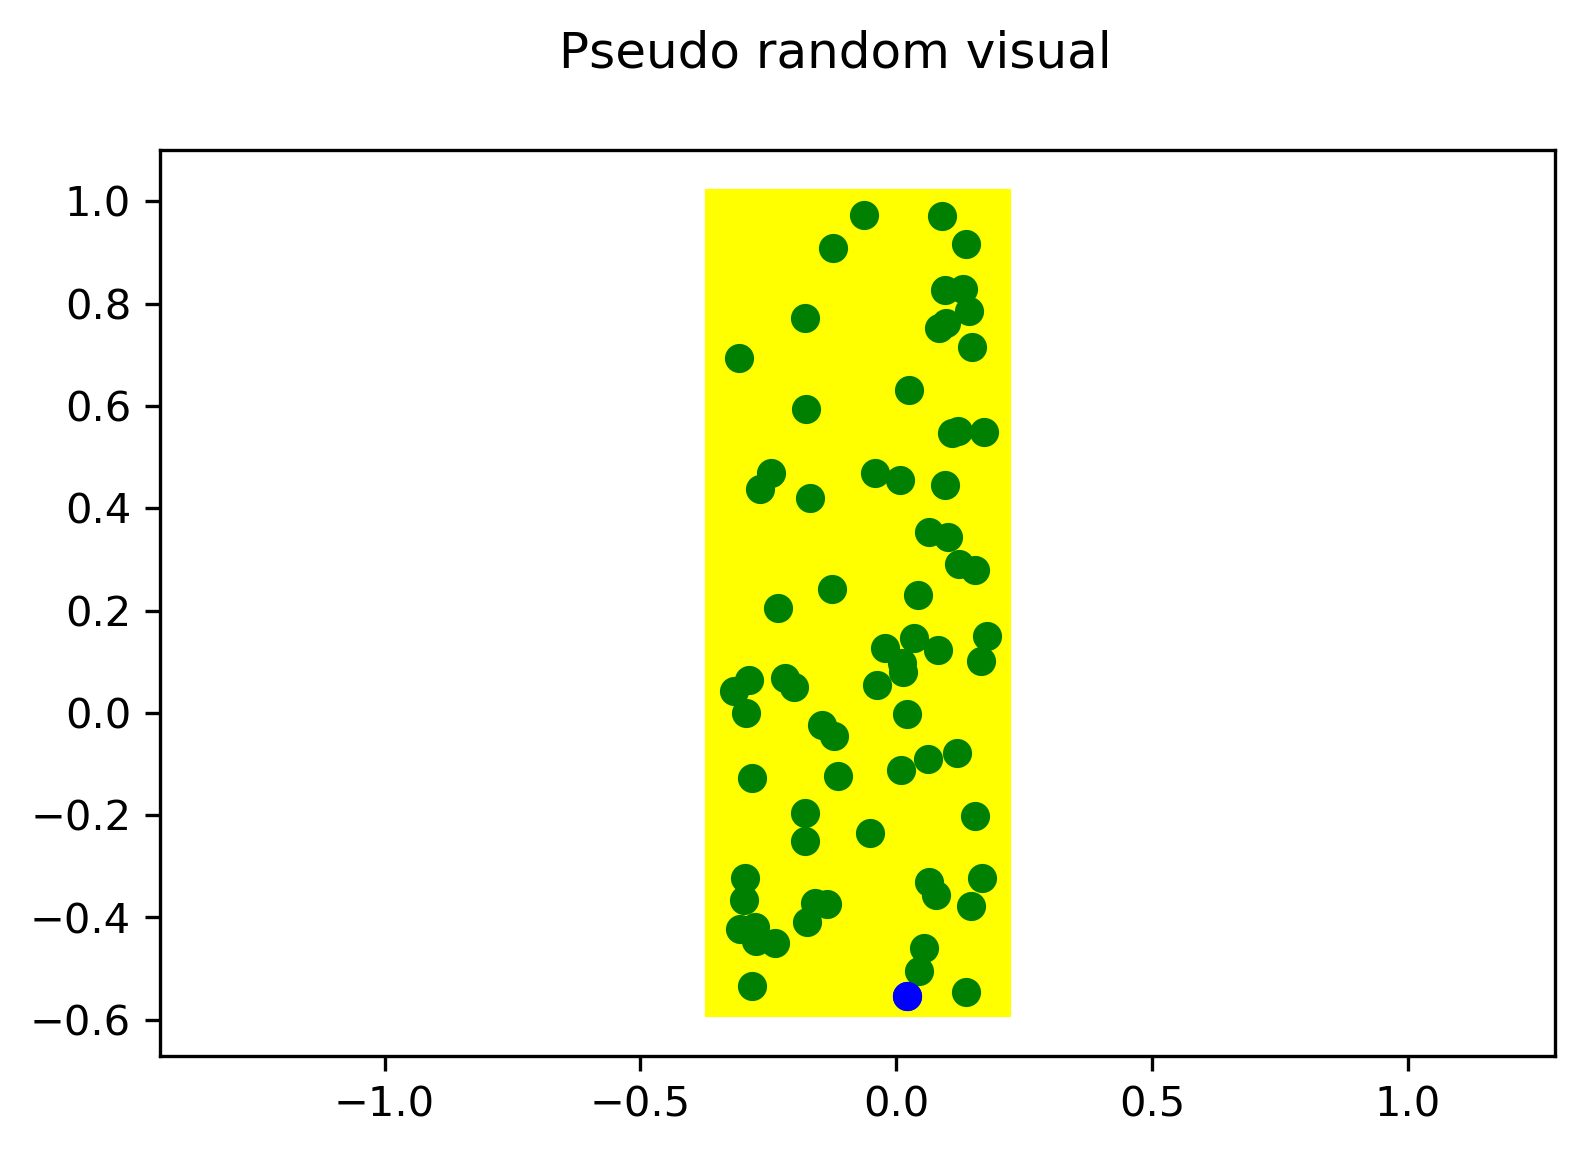

In [87]:
xcut_offset=0
ycut_offset=0
xcylinder = 0.021457331
ycylinder = -0.5530283
alpha = (5) * np.pi / 180
loop=0

fig, ax1 = plt.subplots(1, 1, sharex=True,dpi=300, sharey=True)
fig.suptitle("Pseudo random visual")
circle = .075
rectangle = patches.Rectangle((X_cut_min,Y_cut_min), (abs(X_cut_min)+abs(X_cut_max)),(abs(Y_cut_max)+abs(Y_cut_min)) , color="yellow")
ax1.add_patch(rectangle)

x_diff = (0.37 + 0.22)-circle/2
z_diff = (0.59 + 1.02)-circle/2


for k in range (100):
    zn = (Y_cut_min+circle/2) + (np.random.random() * ((Y_cut_max-circle/2) - (Y_cut_min+circle/2)))
    xn = (X_cut_min+circle/2) + (np.random.random() * ((X_cut_max-circle/2) - (X_cut_min+circle/2)))
    x = xn * np.cos(np.pi * alpha / 180.) - zn * np.sin(np.pi * alpha / 180.)
    z = xn * np.sin(np.pi * alpha / 180.) + zn * np.cos(np.pi * alpha / 180.)
    if loop <0.5:
        ax1.plot(xcylinder,ycylinder,"bo")
        x2=xcylinder
        z2=ycylinder
        print("loop")
    elif calculateDistance(x,z,x2,z2)<.3:
#         zn = (Y_cut_min+circle/2) + (np.random.random() * ((Y_cut_max-circle/2) - (Y_cut_min+circle/2)))
#         xn = (X_cut_min+circle/2) + (np.random.random() * ((X_cut_max-circle/2) - (X_cut_min+circle/2)))
#         x = xn * np.cos(np.pi * alpha / 180.) - zn * np.sin(np.pi * alpha / 180.)
#         z = xn * np.sin(np.pi * alpha / 180.) + zn * np.cos(np.pi * alpha / 180.)
#         ax1.plot(x,z,"go")
        print("small")
        print(calculateDistance(x,z,x2,z2))
        next
#         x2=x
#         z2=z
    else :
        ax1.plot(x,z,"go")
        print(calculateDistance(x,z,x2,z2))
        x2=x
        z2=z
    loop+=1    
    

ax1.plot(xcylinder,ycylinder,"bo")
#rectangle = patches.Rectangle((-.59,0), .71,1.61, color="green")
#ax1.add_patch(rectangle)

ax1.axis("equal") 
plt.show()

### Graveyard for dividing rectangle solution 

In [32]:
def divide_equally(n):
    if (n<3):
        return [n, 1]
    result = list()
    for i in range(1, int(n ** 0.5) + 1):
       div, mod = divmod(n, i)
       #ignore 1 and n itself as factors
       if mod == 0 and i != 1 and div != n:
           result.append(div)
           result.append(i)
    if len(result)==0: # if no factors then add 1
        return divide_equally(n+1)
    return result[len(result)-2:]

print (divide_equally(3))
print (divide_equally(50))
print (divide_equally(99))
print (divide_equally(23))
print (divide_equally(50))

[2, 2]
[10, 5]
[11, 9]
[6, 4]
[10, 5]


In [1]:
def pointInRect(point,rect):
    x1, y1, w, h = rect
    x2, y2 = x1+w, y1+h
    x, y = point
    if (x1 < x and x < x2):
        if (y1 < y and y < y2):
            return True
    return False

In [9]:
circle = .075

x_diff = (0.37 + 0.22)-circle/2
xn = np.random.random() * x_diff - 0.37
z_diff = (0.59 + 1.02)-circle/2
zn = np.random.random() * z_diff - 0.59


zn = np.random.random() * z_diff - (z_diff / 2.)
xn = np.random.random() * x_diff - (x_diff / 2.)
print(zn,xn)

-0.4618294659009127 -0.23837200501769018
